C:\Users\Laptop\project-1/TRUMP_all_tweets.png
C:\Users\Laptop\project-1/TRUMP_pos_tweets.png
C:\Users\Laptop\project-1/TRUMP_neg_tweets.png
in vectorization
in vectorization
in vectorization


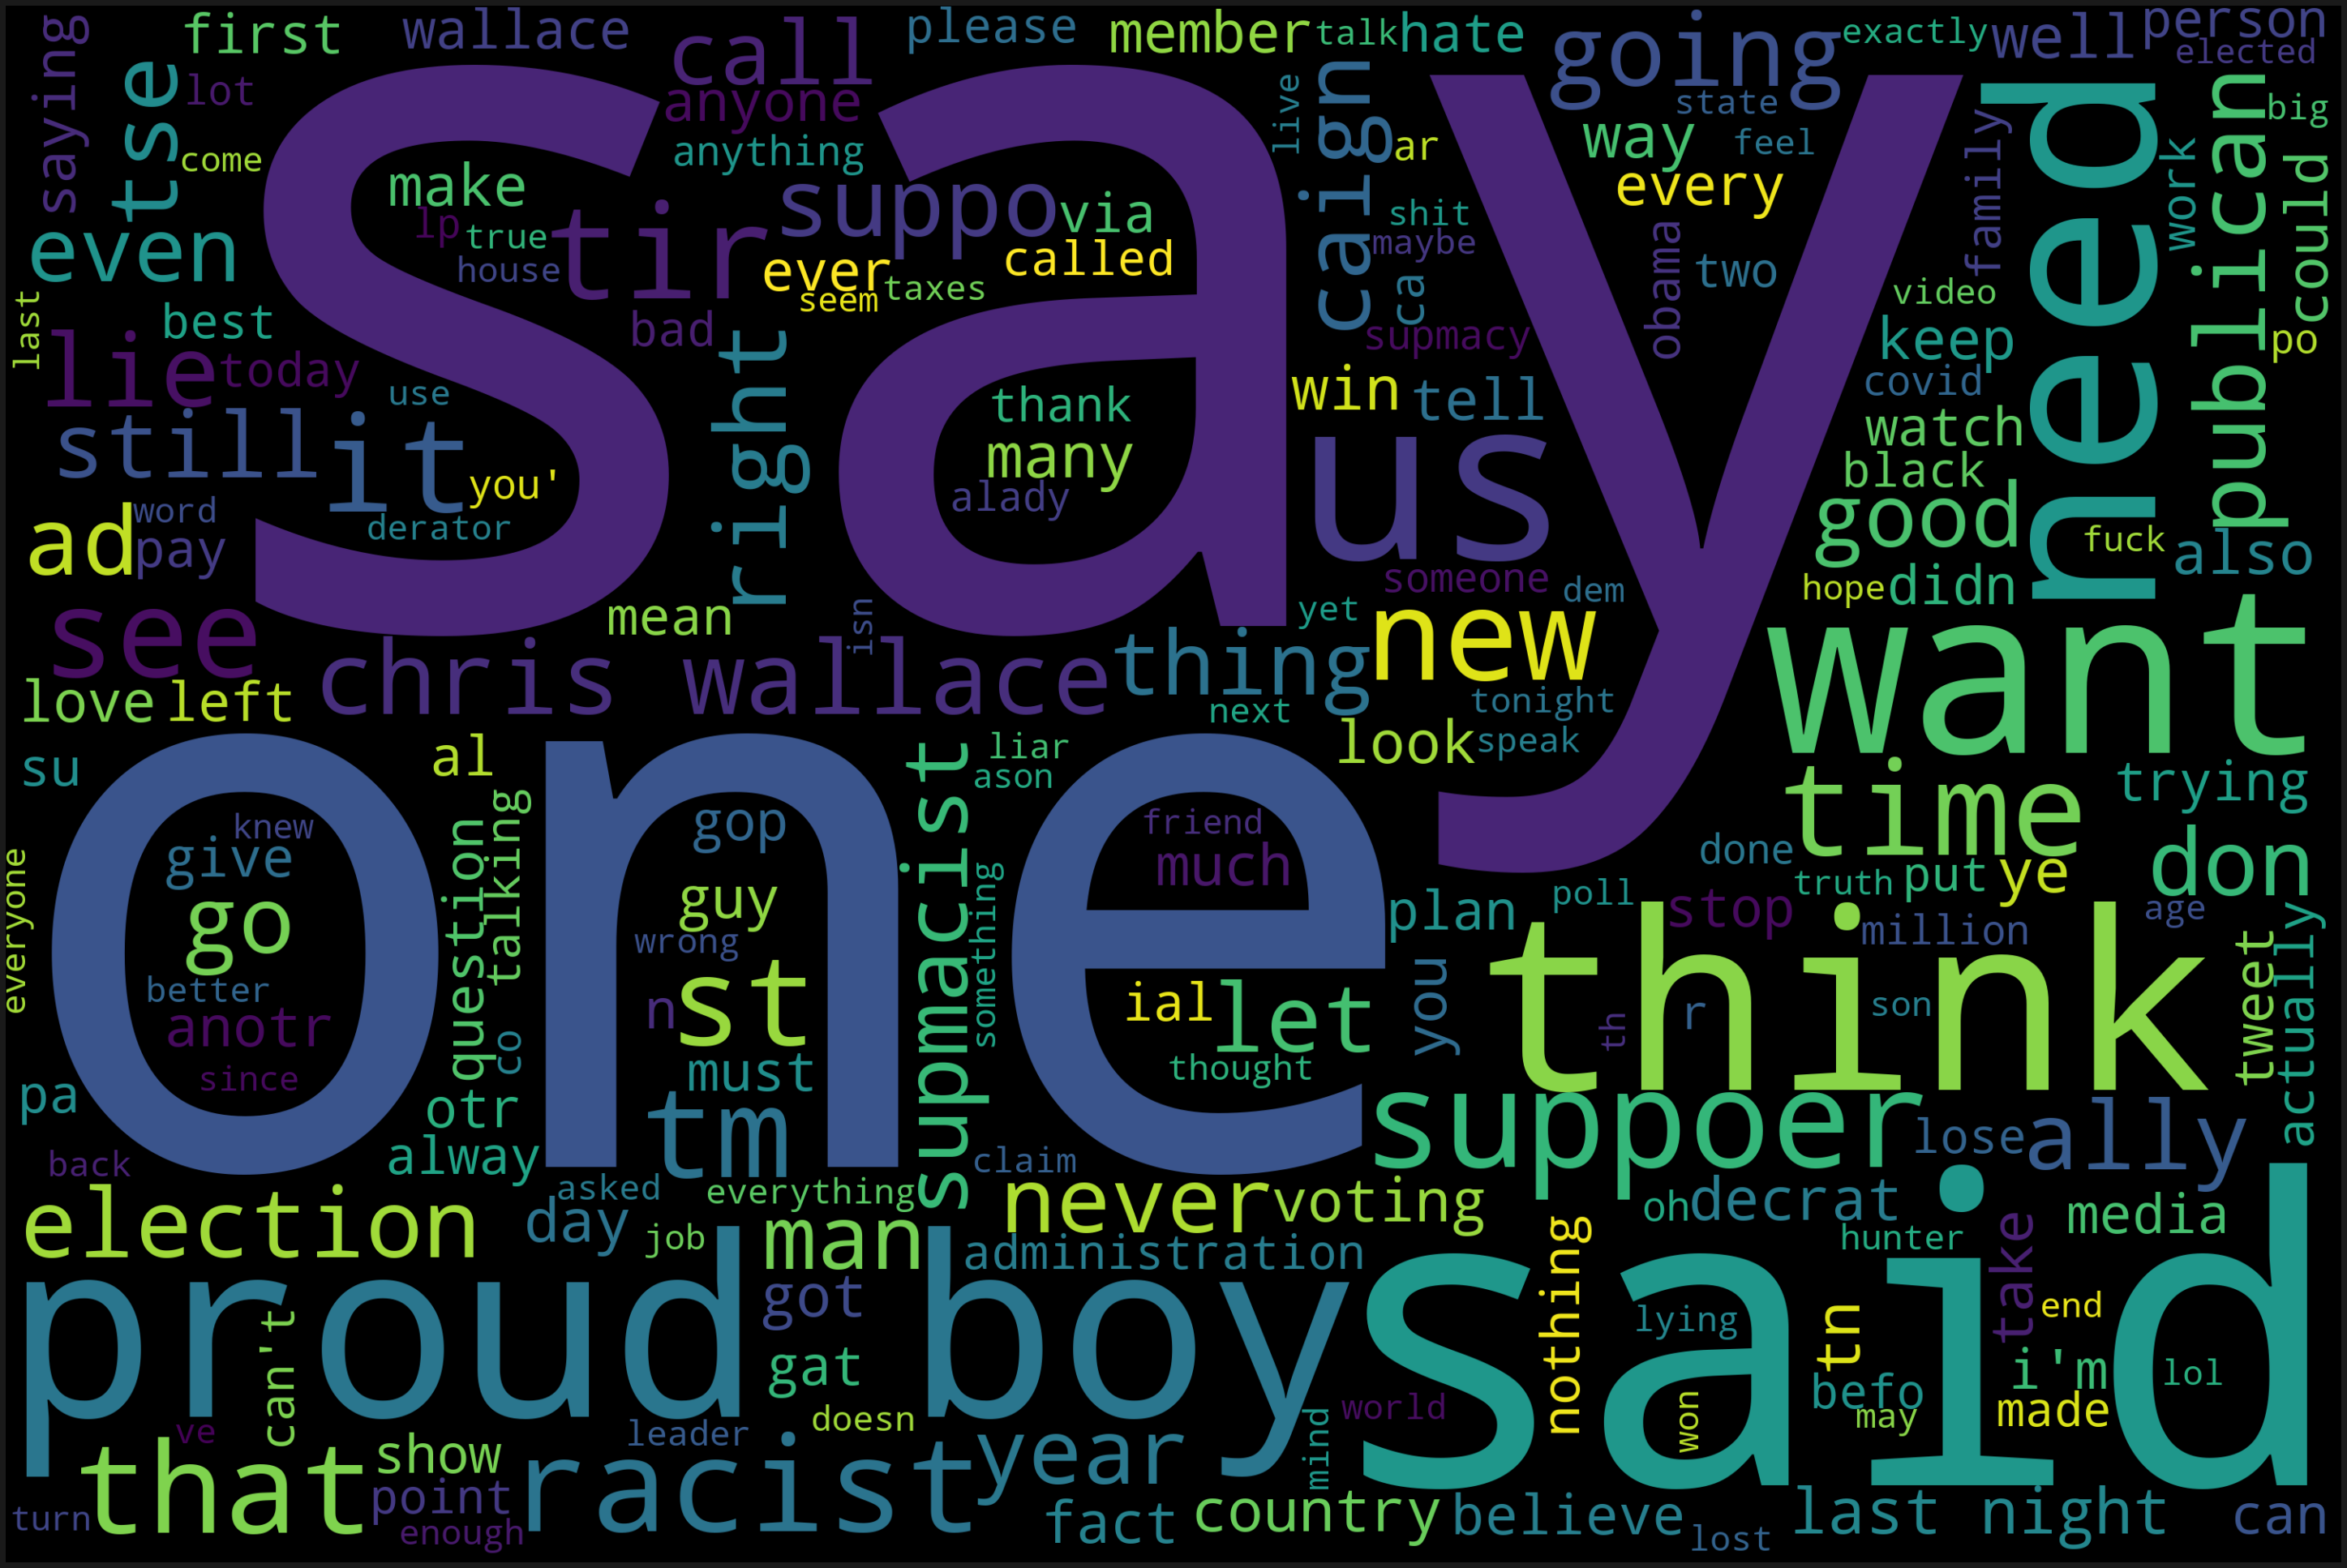

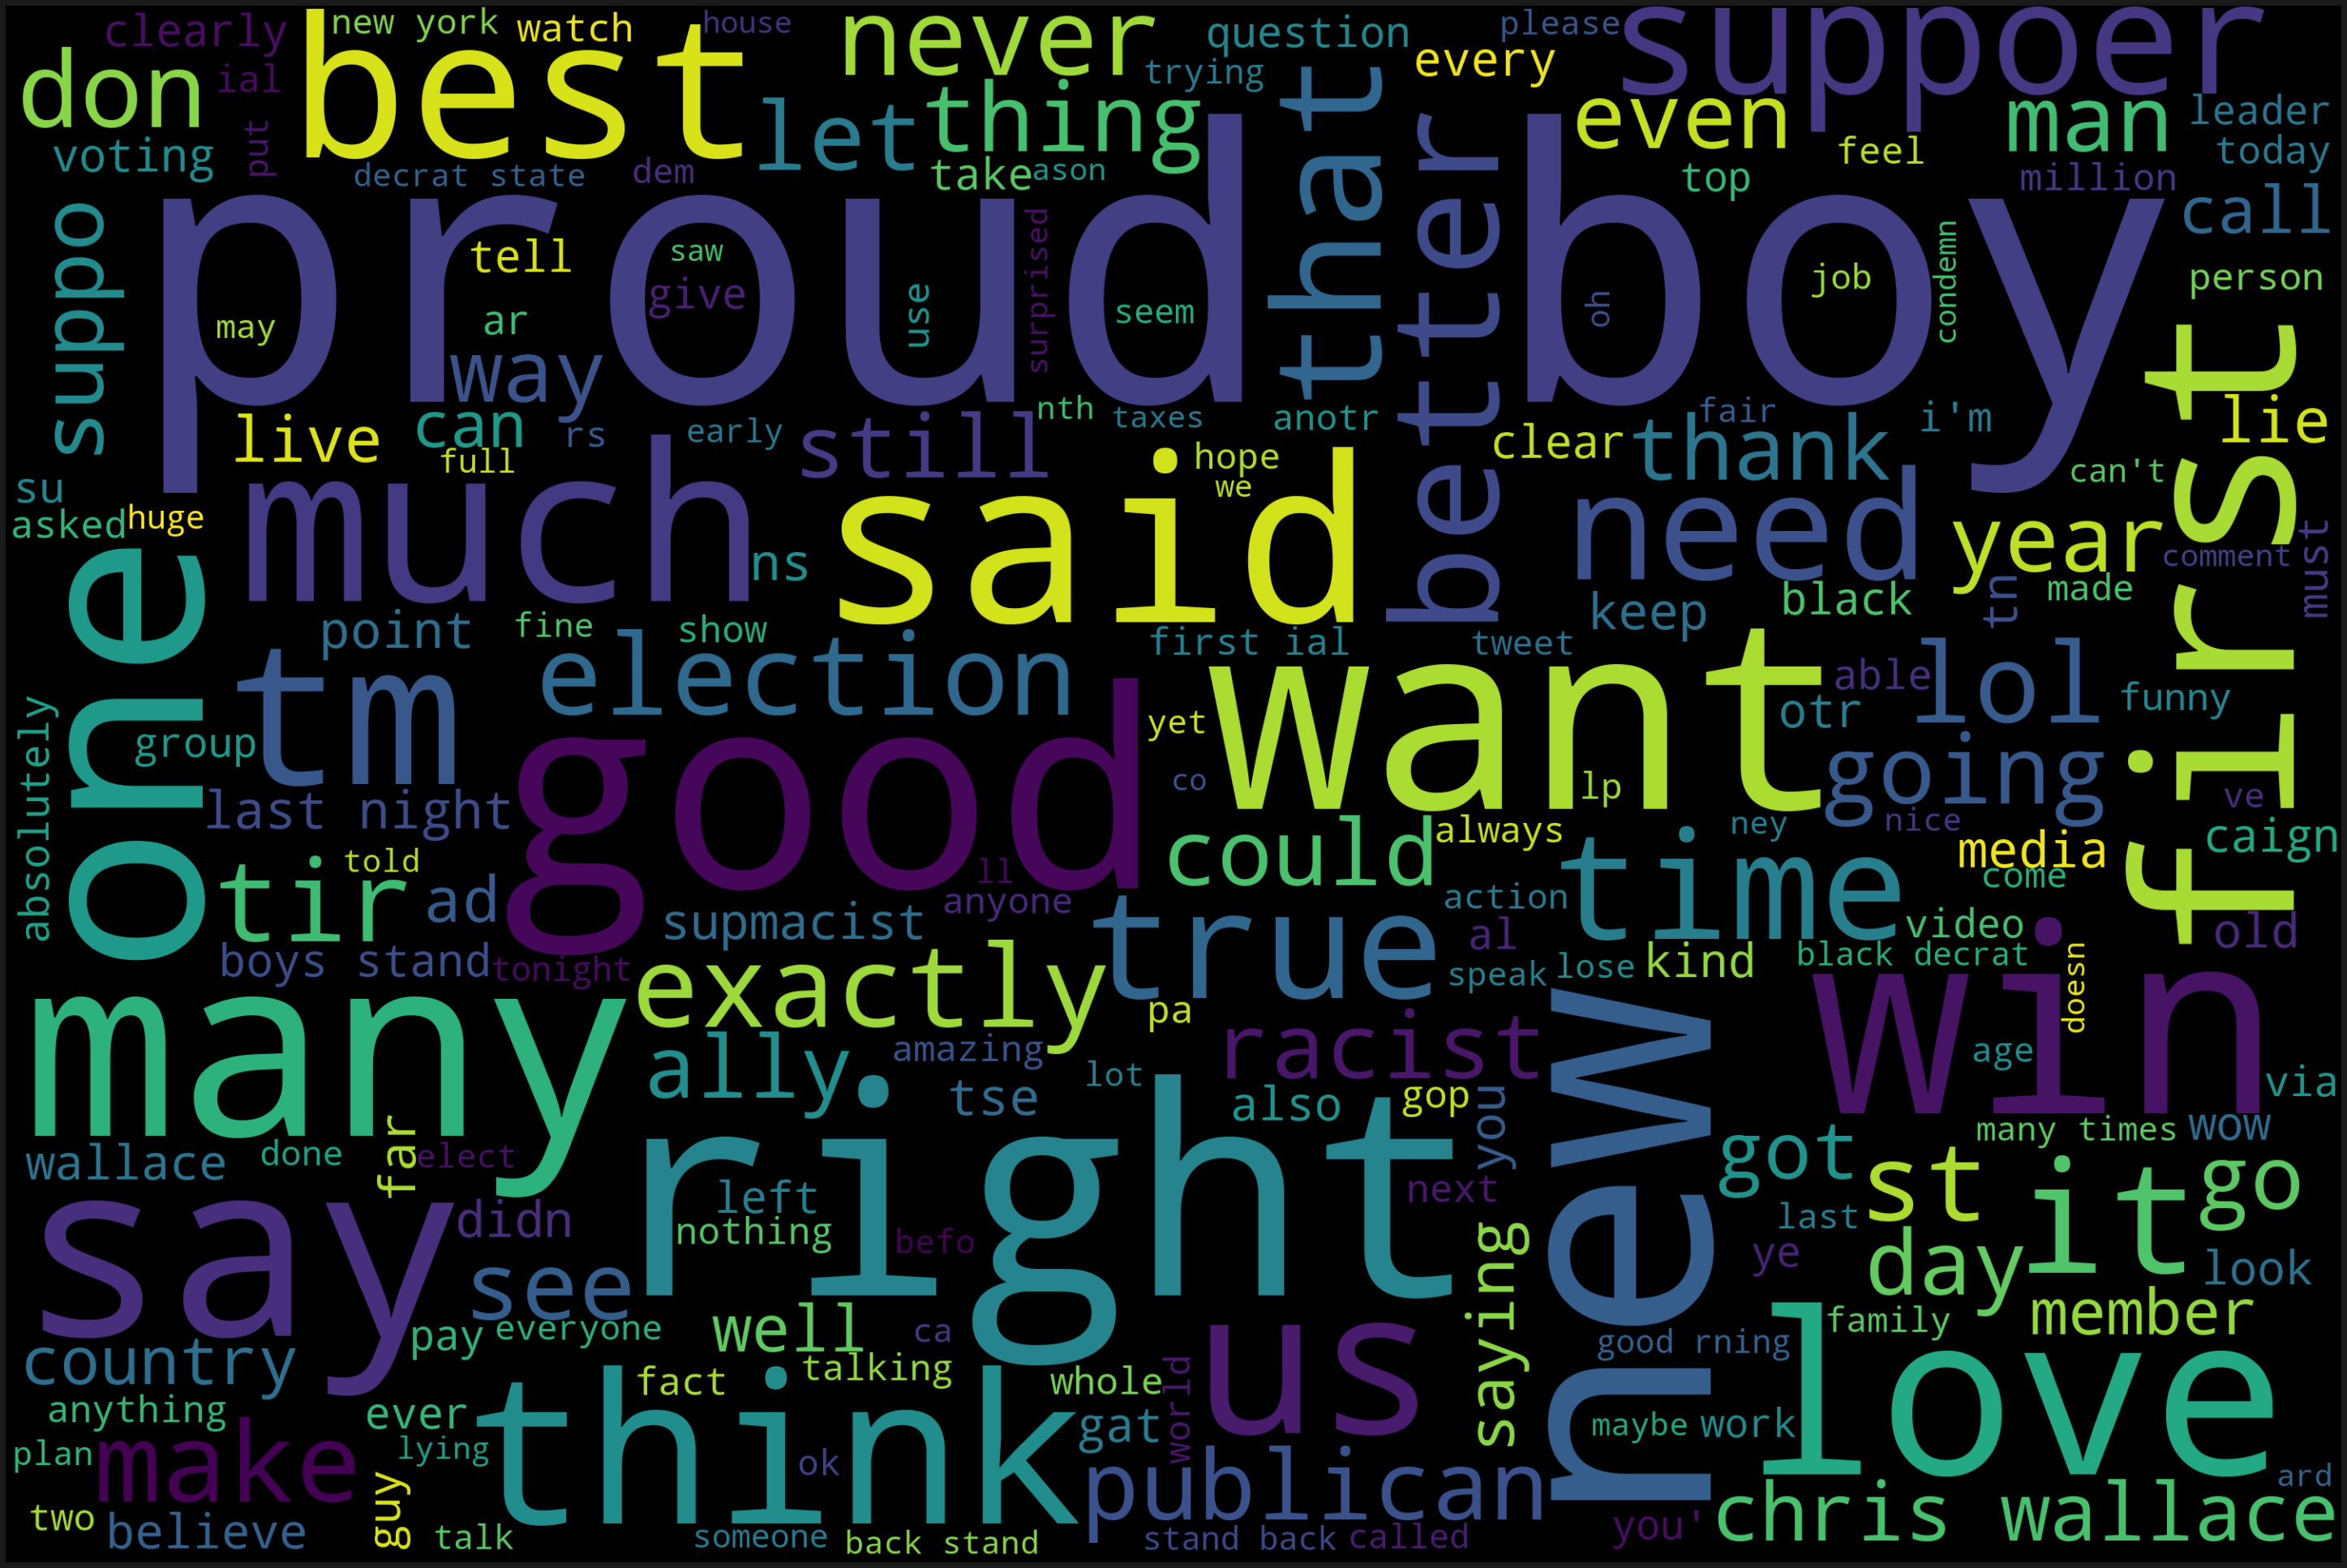

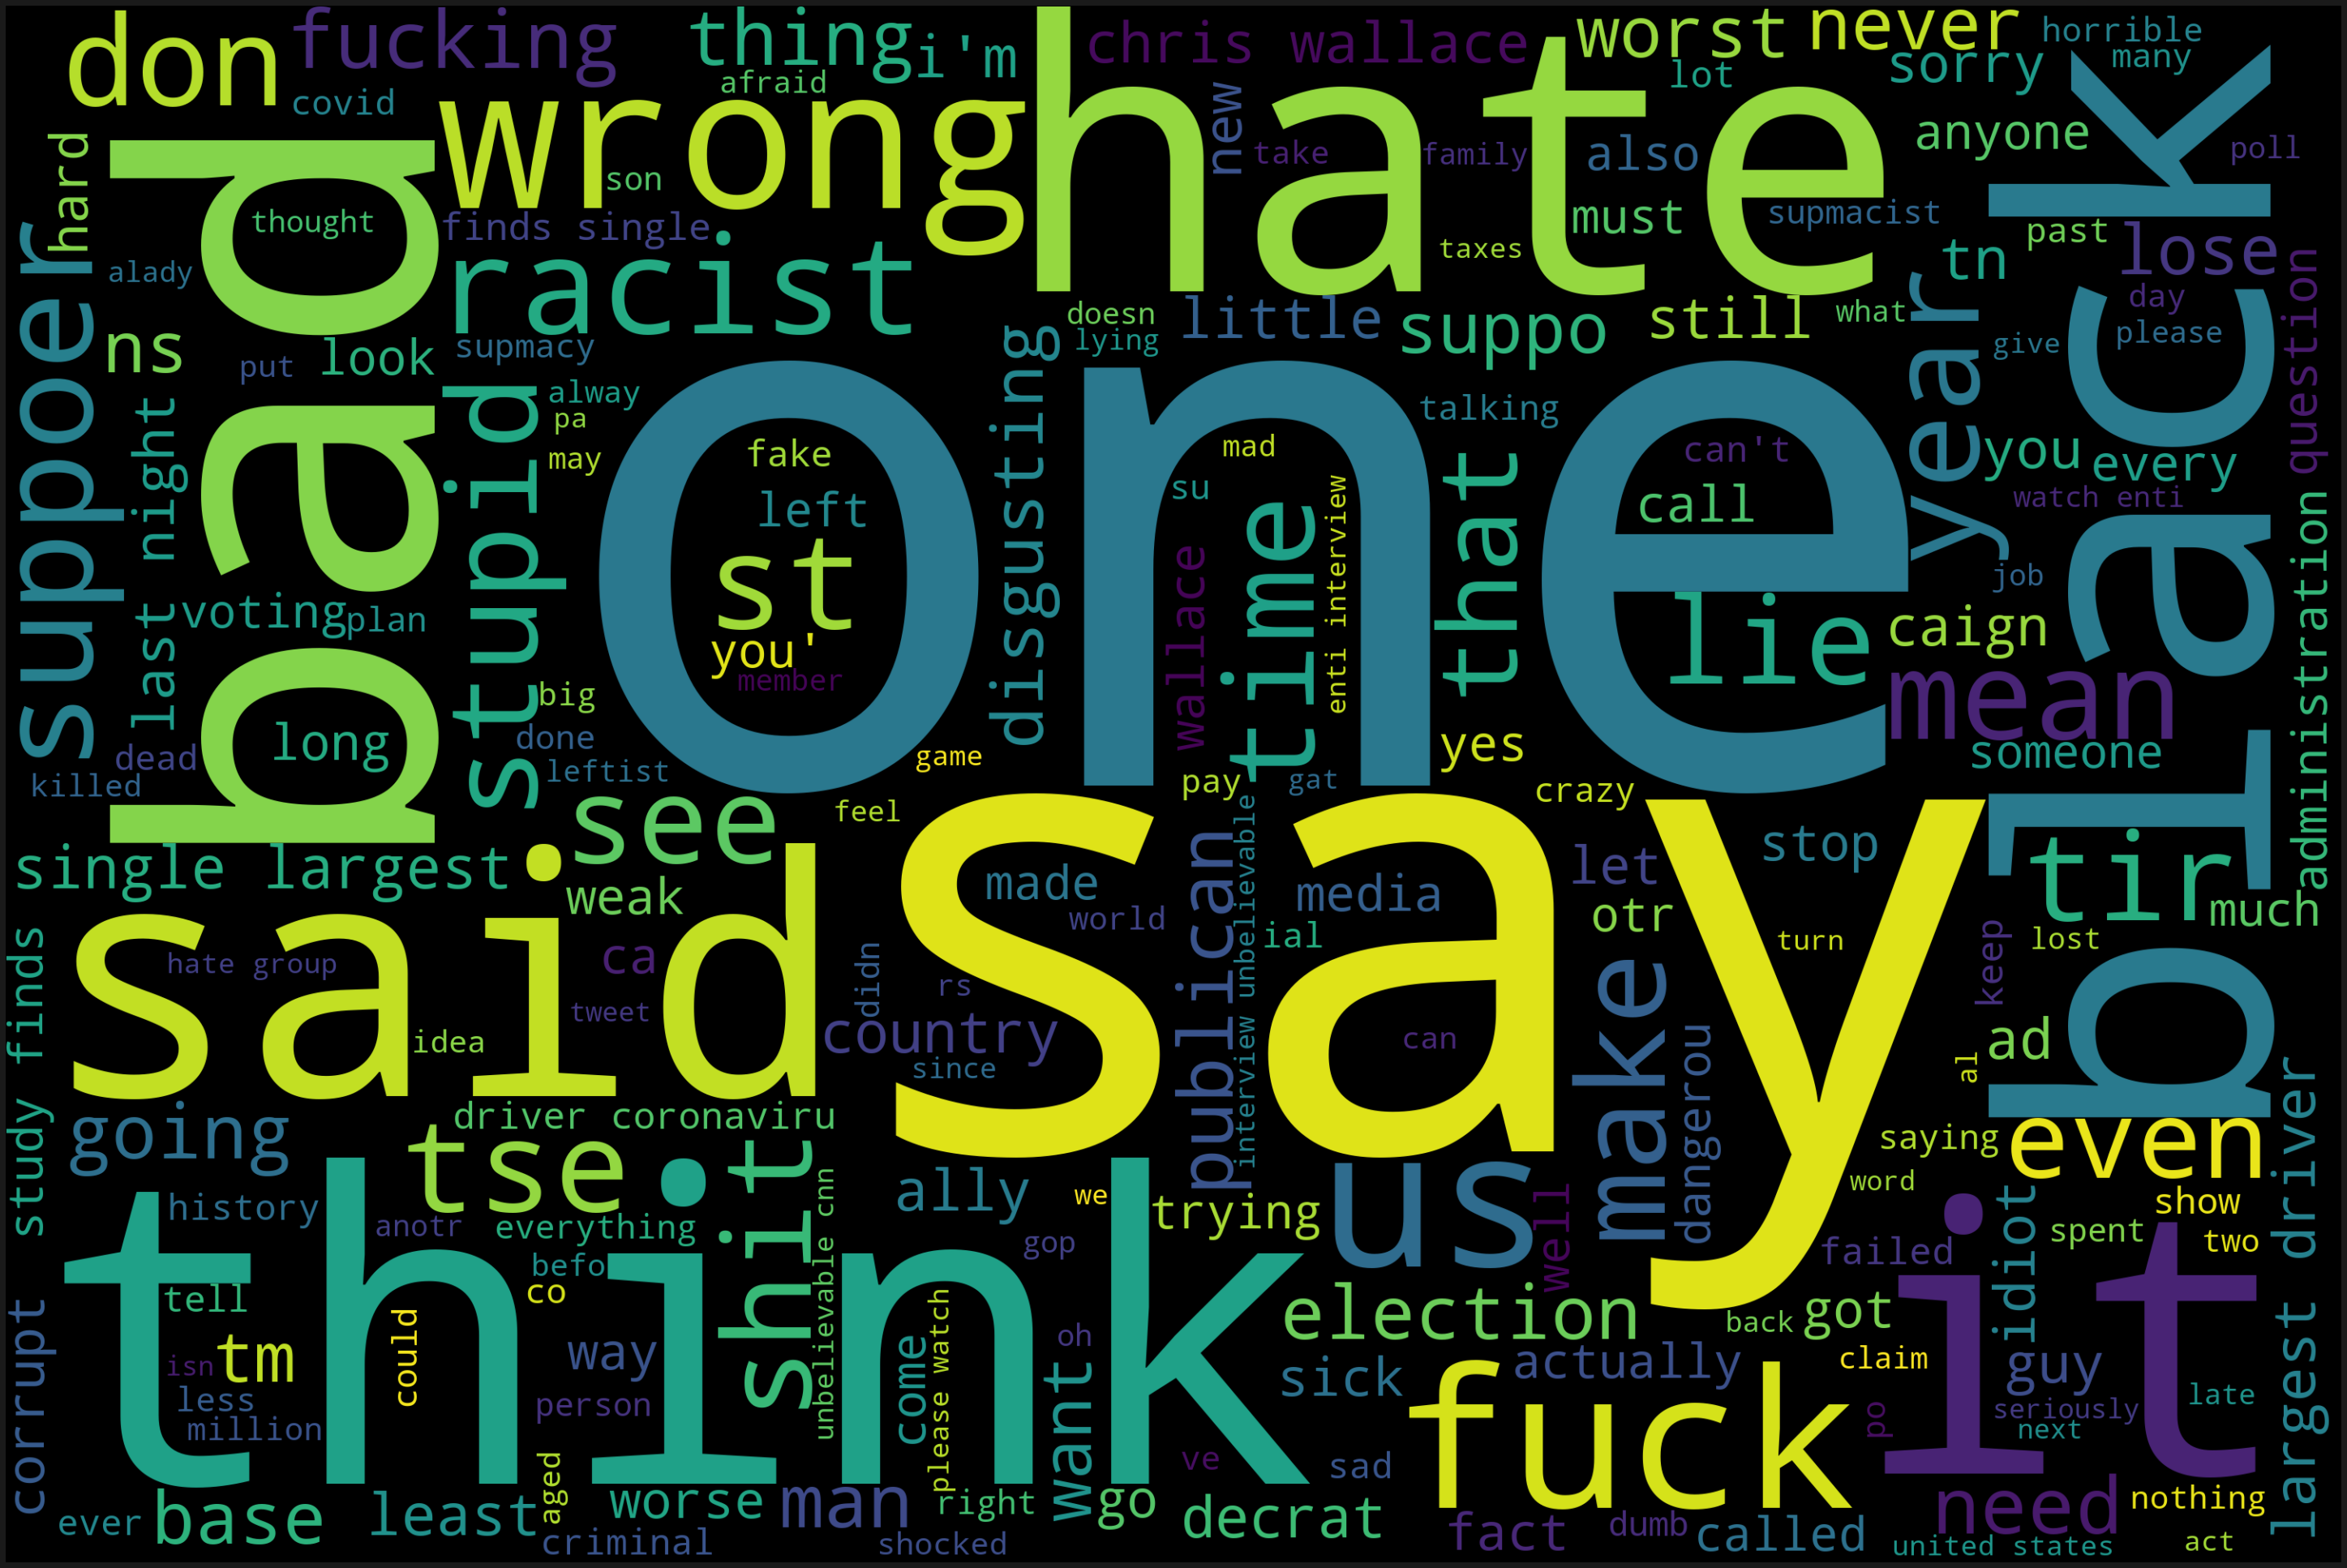

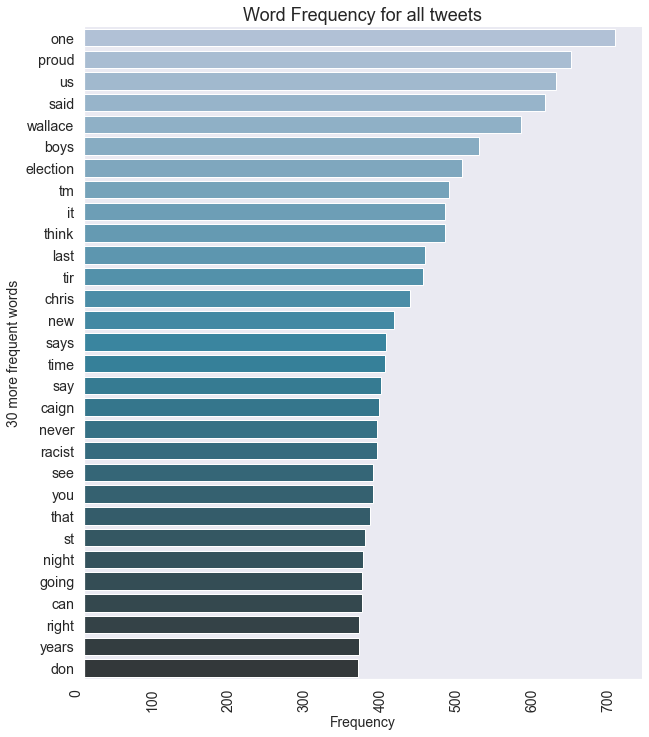

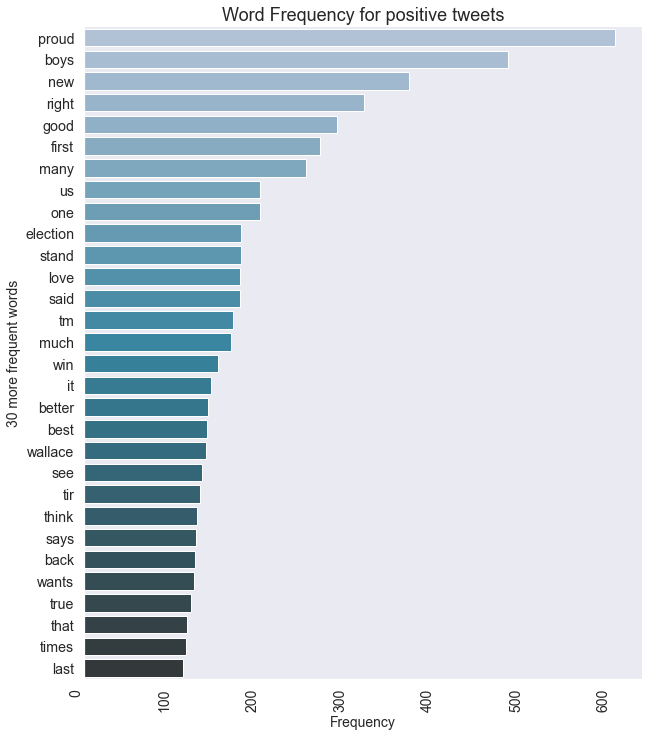

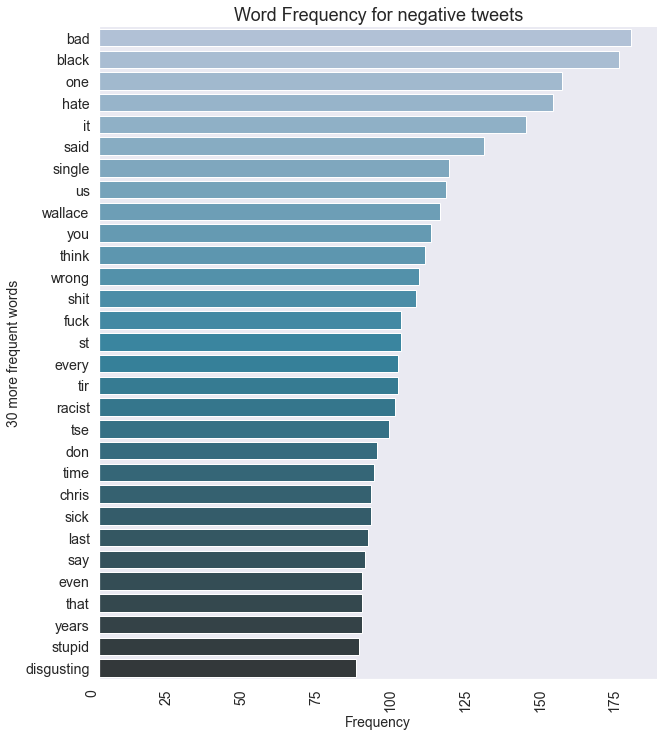

In [4]:

import sqlalchemy as db
import numpy as np
import pandas as pd
from nltk.corpus import (stopwords)
import os
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import ( CountVectorizer)
import collections
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)


class extractDB():
    
    def sqlconnect(self):

        sqlengine = db.create_engine('postgres+psycopg2://%s:%s@%s:%s/%s'%('postgres','122206','localhost','5432','TWITTERSENT'))

        con = sqlengine.connect()

        s="SELECT * FROM TWEETS_TRUMP;"

        df = pd.read_sql(s,con, index_col="tweet_id")

        return df
        
class data_preparation():
   

    def preprocessing(self,df):

       
        df['tweet_text'] = df['tweet_text'].str.lower()
       
        df['tweet_text'] = df['tweet_text'].str.replace('rt', '')
     
        df['tweet_text'] = df['tweet_text'].replace(r'@\w+', '', regex=True)
        
        df['tweet_text'] = df['tweet_text'].replace(r'http\S+', '', regex=True)
        df['tweet_text'] = df['tweet_text'].replace(r'www.[^ ]+', '', regex=True)
        
        df['tweet_text'] = df['tweet_text'].replace('\n',' ', regex=True)
        
        df['tweet_text'] = df['tweet_text'].replace(r'[0-9]+', '', regex=True)
        
        df['tweet_text'] = df['tweet_text'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)
        
        df['tweet_text'] = df['tweet_text'].str.replace('trump', '')
        df['tweet_text'] = df['tweet_text'].str.replace('biden', '')
        df['tweet_text'] = df['tweet_text'].str.replace('president', '')
        df['tweet_text'] = df['tweet_text'].str.replace('donald', '')
        df['tweet_text'] = df['tweet_text'].str.replace('debate', '')
        df['tweet_text'] = df['tweet_text'].str.replace('white', '')
        df['tweet_text'] = df['tweet_text'].str.replace('like', '')
        df['tweet_text'] = df['tweet_text'].str.replace('would', '')
        df['tweet_text'] = df['tweet_text'].str.replace('know', '')
        df['tweet_text'] = df['tweet_text'].str.replace('re', '')
        df['tweet_text'] = df['tweet_text'].str.replace('get', '')
        df['tweet_text'] = df['tweet_text'].str.replace('america', '')
        df['tweet_text'] = df['tweet_text'].str.replace('joe', '')
        df['tweet_text'] = df['tweet_text'].str.replace('vote', '')
        df['tweet_text'] = df['tweet_text'].str.replace('mo', '')
        df['tweet_text'] = df['tweet_text'].str.replace('people', '')
        df['tweet_text'] = df['tweet_text'].str.replace('he', '')
        df['tweet_text'] = df['tweet_text'].str.replace('amp', '')
        df['tweet_text'] = df['tweet_text'].str.replace('ty', '')
        df['tweet_text'] = df['tweet_text'].str.replace('wn', '')

        return df


    def remove_stopwords(self,df):
        
        stop_words_eng = stopwords.words('english')

        df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_eng)]))
    
        return df
    
class wordcloud():
    
    def wordclouddraw(self,df,sent):

        if sent == 'positive':
   
            text_filtered_sentiment = df['sentiment'] == 1
            text_filtered_sentiment2 = df[text_filtered_sentiment]
            text = text_filtered_sentiment2.tweet_text.to_string(index=False, header=False)
            filename = "/TRUMP_pos_tweets.png"

        elif sent == 'negative':

            text_filtered_sentiment = df['sentiment'] == -1
            text_filtered_sentiment2 = df[text_filtered_sentiment]
            text = text_filtered_sentiment2.tweet_text.to_string(index=False, header=False)
            filename = "/TRUMP_neg_tweets.png"

        else:
            
            text = df.tweet_text.to_string( index=False, header=False)
            filename = "/TRUMP_all_tweets.png"

        file = os.getcwd()

        wordcloud = WordCloud(
            width = 3000,
            height = 2000,
            background_color = 'black',
            stopwords=['trump']
        ).generate(text)
       
        fig = plt.figure(
            figsize = (40, 30),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)

        wcpath=file+filename

        print(wcpath)

        wordcloud.to_file(wcpath)
       
class sentimentanalysis():
   
    def analyse_sentiment(self, df):

        sentiment = df

        if sentiment > 0:
            return 1
        elif sentiment == 0:
            return 0
        else:
            return -1

class wordfreq():

    def vectorization(self, df, sent2):
        
        countv = CountVectorizer()
        bow = countv.fit_transform(df.tweet_text)
        word_freq = dict(zip(countv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
        word_counter = collections.Counter(word_freq)
        word_counter_df = pd.DataFrame(word_counter.most_common(30), columns=['word', 'freq'])

        print("in vectorization")

        file = os.getcwd()
        title = "Word Frequency for %s tweets" % sent2
        fig, ax = plt.subplots(figsize=(10, 12))
        sns.barplot(x="freq", y="word", data=word_counter_df, palette="PuBuGn_d", ax=ax)

        plt.xticks(
            rotation=90,
            horizontalalignment='right',
            fontweight='light',
           
            size = 14
        )

        plt.xlabel("Frequency", size=14);
        plt.ylabel("30 more frequent words", size=14);

        plt.title(title, size=18)
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);

        filename = "/TRUMP_graph_%s.png" %sent2
        graphpath = file + filename
        plt.savefig(graphpath, format="png")
        
if __name__ == '__main__':


    selectdb = extractDB()
    datapreparation = data_preparation()
    genwordcloud = wordcloud()
    senti=sentimentanalysis()
    wf = wordfreq()

    df = selectdb.sqlconnect()
    datapreparation.preprocessing(df)
    datapreparation.remove_stopwords(df)
   
    df['sentiment'] = df.tweet_text.apply(lambda tweet_text: TextBlob(tweet_text).sentiment.polarity)

    
    df['sentiment'] = np.array([senti.analyse_sentiment(df) for df in df['sentiment']])

    genwordcloud.wordclouddraw(df, sent="all")
    genwordcloud.wordclouddraw(df, sent="positive")
    genwordcloud.wordclouddraw(df, sent="negative")

    wf.vectorization(df, sent2="all")
  
    wf.vectorization(df[df['sentiment'] == 1], sent2="positive")
    wf.vectorization(df[df['sentiment'] == -1], sent2="negative")